<h1><center>CSEN1022:Assignment 2</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

**Member 1**

Name: Mohammad Marwan Sultan

GUC-ID: 43-3275

Elective Tutorial No.: T-06

**Member 2**

Name: Mariam Ashraf Hindawi

GUC-ID: 43-3771

Elective Tutorial No.: T-06

<hr style="border:2px solid black"> </hr>

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

<hr style="border:2px solid black"> </hr>

## Classifier class and functions

Functions to calculate the value of a gaussian distribution

In [2]:
def gaussian_dist(x , mean , variance):
    return (1 / np.sqrt(2*np.pi*variance)) * np.exp(((x-mean)**2) / (-2*variance))

In [3]:
def multivariate_gaussian_dist(x , mean, covariance):
    diff = x - mean
    return -0.5 * (diff.T @ covariance["inverse"] @ diff)

Function to get the confusion matrix

In [4]:
def get_confusion_matrix(Y_test, Y_predict, labels):
    number_of_classes = len(labels)
    confusion_matrix = np.zeros((number_of_classes, number_of_classes))
    for i in range(len(Y_test)):
        row = labels.index(Y_test[i])
        column = labels.index(Y_predict[i])
        confusion_matrix[row][column] += 1
    return confusion_matrix

Naive Bayes classifier class

In [5]:
class NaiveBayesClassifier:
    def __init__(self):
        self.labels = []
        self.count_classes = []
        self.m_classes = []
        self.v_classes = []
    
    def train(self, X_train, Y_train, labels):
        self.labels = labels
        X_classes = []
        for i in range (0, len(labels)):
            X_classes.append([])

        for i in range (0, len(X_train)):
            for j in range (0, len(labels)):
                if Y_train[i] == labels[j]:
                    X_classes[j].append(X_train[i])
                    break

        for i in range (0, len(X_classes)):
            X_classes[i] = np.array(X_classes[i])
            self.count_classes.append(len(X_classes[i]))
            self.m_classes.append(np.mean(X_classes[i], axis=0))
            self.v_classes.append(np.var(X_classes[i], axis=0))
    

    def predict(self, feature_vector):
        p_classes = []
        for i in range (0, len(self.labels)):
            mean_class = self.m_classes[i]
            variance_class = self.v_classes[i]
            p_class = self.count_classes[i] / sum(self.count_classes)
            for j in range (0, len(feature_vector)):
                g_feature = gaussian_dist(feature_vector[j], mean_class[j], variance_class[j])
                p_class *= g_feature
            p_classes.append(p_class)
        
        max_p = 0
        max_p_class = ""
        for i in range (0, len(self.labels)):
            if p_classes[i] >= max_p:
                max_p = p_classes[i]
                max_p_class = labels[i]

        return max_p_class

Gaussian generative classifier class

In [6]:
class GaussianGenerativeClassifier:
    def __init__(self):
        self.labels = []
        self.count_classes = []
        self.m_classes = []
        self.covariance_matrix = {}
    
    def train(self, X_train, Y_train, labels):
        self.labels = labels
        X_classes = []
        for i in range (0, len(labels)):
            X_classes.append([])

        for i in range (0, len(X_train)):
            for j in range (0, len(labels)):
                if Y_train[i] == labels[j]:
                    X_classes[j].append(X_train[i])
                    break

        number_of_datapoints = X_train.shape[0]
        number_of_features = X_train.shape[1]
        covariance_matrix = np.zeros((number_of_features, number_of_features))
        for i in range (0, len(X_classes)):
            X_classes[i] = np.array(X_classes[i])
            n_class = len(X_classes[i])
            m_class = np.mean(X_classes[i], axis=0)
            for j in range (0, len(X_classes[i])):
                diff = (X_classes[i][j] - m_class).reshape(-1, 1)
                covariance_matrix += (diff @ diff.T)
            self.count_classes.append(n_class)
            self.m_classes.append(m_class)
        
        covariance_matrix /= number_of_datapoints
        self.covariance_matrix["matrix"] = covariance_matrix
        self.covariance_matrix["inverse"] = np.linalg.pinv(covariance_matrix)
    
    
    def predict(self, feature_vector):
        p_classes = []
        for i in range (0, len(self.labels)):
            mean_class = self.m_classes[i]
            p_class = self.count_classes[i] / sum(self.count_classes)
            g_class = multivariate_gaussian_dist(feature_vector, mean_class, self.covariance_matrix)
            p_classes.append(p_class * g_class)
        
        max_p = -np.inf
        max_p_class = ""
        for i in range (0, len(self.labels)):
            if p_classes[i] >= max_p:
                max_p = p_classes[i]
                max_p_class = labels[i]

        return max_p_class

<hr style="border:2px solid black"> </hr>

## Getting the images and their labels

Read training and testing images

In [7]:
airplane_train_images = np.array([cv2.imread("Data/Train/airplane/"+str(i)+".jpg") for i in range(0, 5000)])
automobile_train_images = np.array([cv2.imread("Data/Train/automobile/"+str(i)+".jpg") for i in range(0, 5000)])
frog_train_images = np.array([cv2.imread("Data/Train/frog/"+str(i)+".jpg") for i in range(0, 5000)])

airplane_test_images = np.array([cv2.imread("Data/Test/airplane/"+str(i)+".jpg") for i in range(0, 1000)])
automobile_test_images = np.array([cv2.imread("Data/Test/automobile/"+str(i)+".jpg") for i in range(0, 1000)])
frog_test_images = np.array([cv2.imread("Data/Test/frog/"+str(i)+".jpg") for i in range(0, 1000)])

Getting labels for all the classes train and test data

In [8]:
Y_train = ["airplane" for i in range(airplane_train_images.shape[0])]
Y_train += ["automobile" for i in range(automobile_train_images.shape[0])]
Y_train += ["frog" for i in range(frog_train_images.shape[0])]

Y_test = ["airplane" for i in range(airplane_test_images.shape[0])]
Y_test += ["automobile" for i in range(automobile_test_images.shape[0])]
Y_test += ["frog" for i in range(frog_test_images.shape[0])]

labels = ["airplane", "automobile", "frog"]

<hr style="border:2px solid black"> </hr>

## Training and testing the classifiers

Initialize confusion matrices arrays

In [9]:
confusion_matrices_nb = []
confusion_matrices_gm = []

### 32X32

Transforming the images into feature vectors and normalizing them

In [10]:
X_airplane_train_32 = np.array([airplane_train_images[i].reshape(-1) for i in range(0, airplane_train_images.shape[0])])
X_automobile_train_32 = np.array([automobile_train_images[i].reshape(-1) for i in range(0, automobile_train_images.shape[0])])
X_frog_train_32 = np.array([frog_train_images[i].reshape(-1) for i in range(0, frog_train_images.shape[0])])

X_airplane_test_32 = np.array([airplane_test_images[i].reshape(-1) for i in range(0, airplane_test_images.shape[0])])
X_automobile_test_32 = np.array([automobile_test_images[i].reshape(-1) for i in range(0, automobile_test_images.shape[0])])
X_frog_test_32 = np.array([frog_test_images[i].reshape(-1) for i in range(0, frog_test_images.shape[0])])

X_train_32 = np.concatenate((X_airplane_train_32, X_automobile_train_32, X_frog_train_32)) / 255.0
X_test_32 = np.concatenate((X_airplane_test_32, X_automobile_test_32, X_frog_test_32)) / 255.0

Train and test Naive Bayes classifier

In [11]:
nb_classifier_32 = NaiveBayesClassifier()
nb_classifier_32.train(X_train_32, Y_train, labels)

In [12]:
Y_predict_nb_32 = []
for i in range(X_test_32.shape[0]):
    Y_predict_nb_32.append(nb_classifier_32.predict(X_test_32[i]))

confusion_matrix_nb_32 = get_confusion_matrix(Y_test, Y_predict_nb_32, labels)
confusion_matrices_nb += [confusion_matrix_nb_32]

C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_10004/4269943613.py:35: RuntimeWarning: overflow encountered in double_scalars
  p_class *= g_feature


Train and test gaussian generative classifier

In [13]:
gm_classifier_32 = GaussianGenerativeClassifier()
gm_classifier_32.train(X_train_32, Y_train, labels)

In [14]:
Y_predict_gm_32 = []
for i in range(X_test_32.shape[0]):
    Y_predict_gm_32.append(gm_classifier_32.predict(X_test_32[i]))

confusion_matrix_gm_32 = get_confusion_matrix(Y_test, Y_predict_gm_32, labels)
confusion_matrices_gm += [confusion_matrix_gm_32]

### 16X16

Transforming the images into feature vectors and normalizing them

In [15]:
X_airplane_train_16 = np.array([cv2.resize(airplane_train_images[i], (16,16), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, airplane_train_images.shape[0])])
X_automobile_train_16 = np.array([cv2.resize(automobile_train_images[i], (16,16), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, automobile_train_images.shape[0])])
X_frog_train_16 = np.array([cv2.resize(frog_train_images[i], (16,16), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, frog_train_images.shape[0])])

X_airplane_test_16 = np.array([cv2.resize(airplane_test_images[i], (16,16), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, airplane_test_images.shape[0])])
X_automobile_test_16 = np.array([cv2.resize(automobile_test_images[i], (16,16), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, automobile_test_images.shape[0])])
X_frog_test_16 = np.array([cv2.resize(frog_test_images[i], (16,16), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, frog_test_images.shape[0])])

X_train_16 = np.concatenate((X_airplane_train_16, X_automobile_train_16, X_frog_train_16)) / 255.0
X_test_16 = np.concatenate((X_airplane_test_16, X_automobile_test_16, X_frog_test_16)) / 255.0

Train and test Naive Bayes classifier

In [16]:
nb_classifier_16 = NaiveBayesClassifier()
nb_classifier_16.train(X_train_16, Y_train, labels)

In [17]:
Y_predict_nb_16 = []
for i in range(X_test_16.shape[0]):
    Y_predict_nb_16.append(nb_classifier_16.predict(X_test_16[i]))

confusion_matrix_nb_16 = get_confusion_matrix(Y_test, Y_predict_nb_16, labels)
confusion_matrices_nb += [confusion_matrix_nb_16]

Train and test gaussian generative classifier

In [18]:
gm_classifier_16 = GaussianGenerativeClassifier()
gm_classifier_16.train(X_train_16, Y_train, labels)

In [19]:
Y_predict_gm_16 = []
for i in range(X_test_16.shape[0]):
    Y_predict_gm_16.append(gm_classifier_16.predict(X_test_16[i]))

confusion_matrix_gm_16 = get_confusion_matrix(Y_test, Y_predict_gm_16, labels)
confusion_matrices_gm += [confusion_matrix_gm_16]

### 8X8

Transforming the images into feature vectors and normalizing them

In [20]:
X_airplane_train_8 = np.array([cv2.resize(airplane_train_images[i], (8,8), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, airplane_train_images.shape[0])])
X_automobile_train_8 = np.array([cv2.resize(automobile_train_images[i], (8,8), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, automobile_train_images.shape[0])])
X_frog_train_8 = np.array([cv2.resize(frog_train_images[i], (8,8), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, frog_train_images.shape[0])])

X_airplane_test_8 = np.array([cv2.resize(airplane_test_images[i], (8,8), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, airplane_test_images.shape[0])])
X_automobile_test_8 = np.array([cv2.resize(automobile_test_images[i], (8,8), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, automobile_test_images.shape[0])])
X_frog_test_8 = np.array([cv2.resize(frog_test_images[i], (8,8), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, frog_test_images.shape[0])])

X_train_8 = np.concatenate((X_airplane_train_8, X_automobile_train_8, X_frog_train_8)) / 255.0
X_test_8 = np.concatenate((X_airplane_test_8, X_automobile_test_8, X_frog_test_8)) / 255.0

Train and test Naive Bayes classifier

In [21]:
nb_classifier_8 = NaiveBayesClassifier()
nb_classifier_8.train(X_train_8, Y_train, labels)

In [22]:
Y_predict_nb_8 = []
for i in range(X_test_8.shape[0]):
    Y_predict_nb_8.append(nb_classifier_8.predict(X_test_8[i]))

confusion_matrix_nb_8 = get_confusion_matrix(Y_test, Y_predict_nb_8, labels)
confusion_matrices_nb += [confusion_matrix_nb_8]

Train and test gaussian generative classifier

In [23]:
gm_classifier_8 = GaussianGenerativeClassifier()
gm_classifier_8.train(X_train_8, Y_train, labels)

In [24]:
Y_predict_gm_8 = []
for i in range(X_test_8.shape[0]):
    Y_predict_gm_8.append(gm_classifier_8.predict(X_test_8[i]))

confusion_matrix_gm_8 = get_confusion_matrix(Y_test, Y_predict_gm_8, labels)
confusion_matrices_gm += [confusion_matrix_gm_8]

### 4X4

Transforming the images into feature vectors and normalizing them

In [25]:
X_airplane_train_4 = np.array([cv2.resize(airplane_train_images[i], (4,4), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, airplane_train_images.shape[0])])
X_automobile_train_4 = np.array([cv2.resize(automobile_train_images[i], (4,4), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, automobile_train_images.shape[0])])
X_frog_train_4 = np.array([cv2.resize(frog_train_images[i], (4,4), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, frog_train_images.shape[0])])

X_airplane_test_4 = np.array([cv2.resize(airplane_test_images[i], (4,4), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, airplane_test_images.shape[0])])
X_automobile_test_4 = np.array([cv2.resize(automobile_test_images[i], (4,4), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, automobile_test_images.shape[0])])
X_frog_test_4 = np.array([cv2.resize(frog_test_images[i], (4,4), interpolation = cv2.INTER_AREA).reshape(-1) for i in range(0, frog_test_images.shape[0])])

X_train_4 = np.concatenate((X_airplane_train_4, X_automobile_train_4, X_frog_train_4)) / 255.0
X_test_4 = np.concatenate((X_airplane_test_4, X_automobile_test_4, X_frog_test_4)) / 255.0

Train and test Naive Bayes classifier

In [26]:
nb_classifier_4 = NaiveBayesClassifier()
nb_classifier_4.train(X_train_4, Y_train, labels)

In [27]:
Y_predict_nb_4 = []
for i in range(X_test_4.shape[0]):
    Y_predict_nb_4.append(nb_classifier_4.predict(X_test_4[i]))

confusion_matrix_nb_4 = get_confusion_matrix(Y_test, Y_predict_nb_4, labels)
confusion_matrices_nb += [confusion_matrix_nb_4]

Train and test gaussian generative classifier

In [28]:
gm_classifier_4 = GaussianGenerativeClassifier()
gm_classifier_4.train(X_train_4, Y_train, labels)

In [29]:
Y_predict_gm_4 = []
for i in range(X_test_4.shape[0]):
    Y_predict_gm_4.append(gm_classifier_4.predict(X_test_4[i]))

confusion_matrix_gm_4 = get_confusion_matrix(Y_test, Y_predict_gm_4, labels)
confusion_matrices_gm += [confusion_matrix_gm_4]

<hr style="border:2px solid black"> </hr>

## Plotting the results

In [30]:
confusion_matrices = confusion_matrices_nb + confusion_matrices_gm

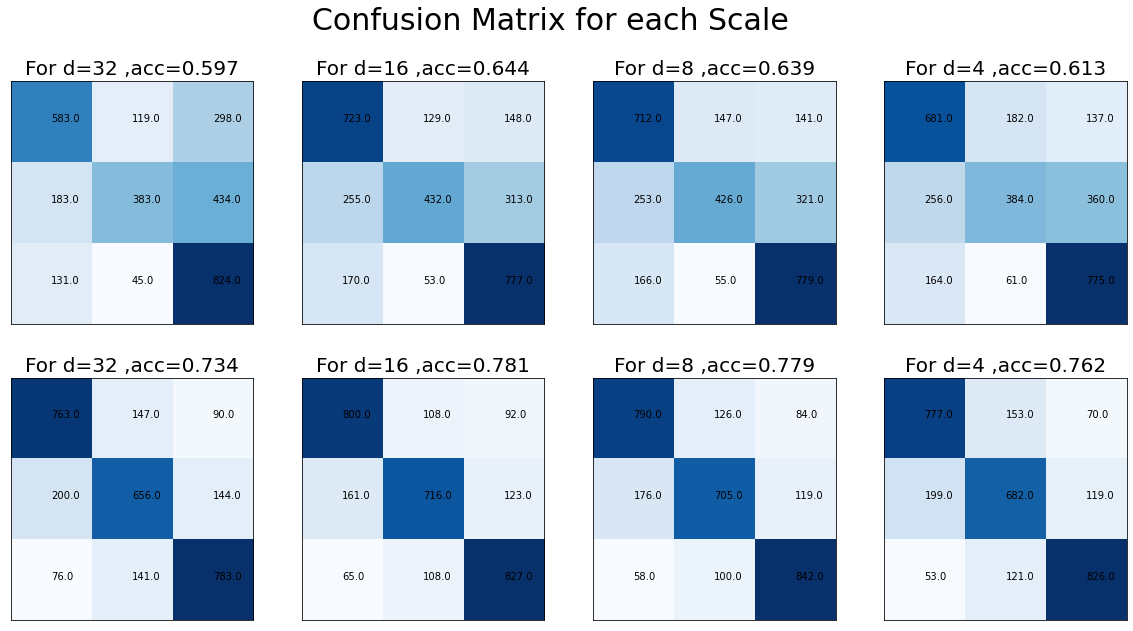

In [31]:
dims = [32,16,8,4,32,16,8,4]
fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Scale",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        axs[pi,pj].set_title("For d="+str(dims[index])+" ,acc="+str(np.round(np.diag(cm).sum()/3000,3)),fontsize=20)
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))
plt.savefig("figure_confusion_matrices")

Plotting the results

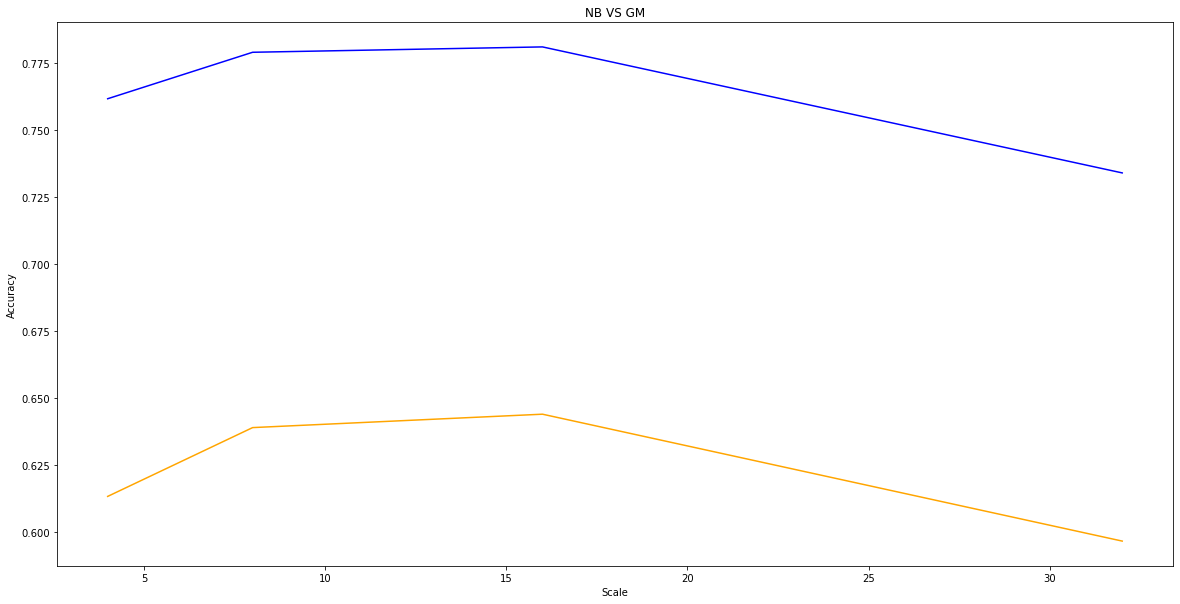

In [32]:
plt.figure(figsize=(20,10))
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_nb],color='orange')
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_gm],color='blue')
plt.xlabel('Scale')
plt.ylabel('Accuracy')
plt.title('NB VS GM')
plt.savefig("figure_comparison")

<hr style="border:2px solid black"> </hr>

## Comments

Edit here

<hr style="border:2px solid black"> </hr>